Experiment 0 : Effect of memory access at different levels.

Goal : To see how runtime increases with increase in matrix size due to memory access shifting from cache to RAM and also get the edge value from where RAM access starts.

Setup:  
Raspberry pi 5, 16GB, running Raspberry Pi OS Bookworm  
Cooling: Active cooler (fan) and heatsink  
Power Supply: 27W USB-C Power supply  
Measurement tools: vcgencmd or sysfs  
Scripts used: latency_bench.py  

Independent variables:  
Matrix size: (64 x 64) to (2049 x 2049)  
Precision: float32  
Cores: 1  
Threads: 1  
GPU: no  
NPU: no  
Active cooling/Fan speed: Default  
Power supply: 27W USB-C Power supply  
Starting temperature: 

Dependent variables:  
Runtime (s)  
GFLOPS  


In [1]:
import os, psutil, sys
sys.path.append("..")  # so Python can find your benchmarks/ folder

# ---  Pin this notebook process to specific CPU core(s)
p = psutil.Process(os.getpid())
p.cpu_affinity([0])  # e.g. [0] for core 0; use [0,1,2,3] for all cores
print(" Pinned to cores:", p.cpu_affinity())

# --- Limit OpenBLAS / NumPy threading (controls how many cores are used)
os.environ["OPENBLAS_NUM_THREADS"] = "1"  # single-core computation
os.environ["OMP_NUM_THREADS"] = "1"

# --- Import and run the benchmark
from benchmarks.latency_bench import run_latency_bench
run_latency_bench(outfile="latency_core0.csv")


 Pinned to cores: [0]
Running latency benchmark | BLAS threads: 1
matrix_n, avg_latency_s
     64, 0.000638
    128, 0.000227
    192, 0.000615
    256, 0.001493
    320, 0.002777
    384, 0.004756
    448, 0.007669
    512, 0.008248
    576, 0.011632
    640, 0.016812
    704, 0.021233
    768, 0.027860
    832, 0.035318
    896, 0.043622
    960, 0.054745
   1024, 0.064010
   1088, 0.078353
   1152, 0.092938
   1216, 0.108396
   1280, 0.126413
   1344, 0.145237
   1408, 0.166483
   1472, 0.191310
   1536, 0.216409
   1600, 0.245820
   1664, 0.275371
   1728, 0.309253
   1792, 0.346241
   1856, 0.383808
   1920, 0.423683
   1984, 0.467823
   2048, 0.510464

✅ Results saved to latency_core0.csv


Plotting runtime vs matrix size

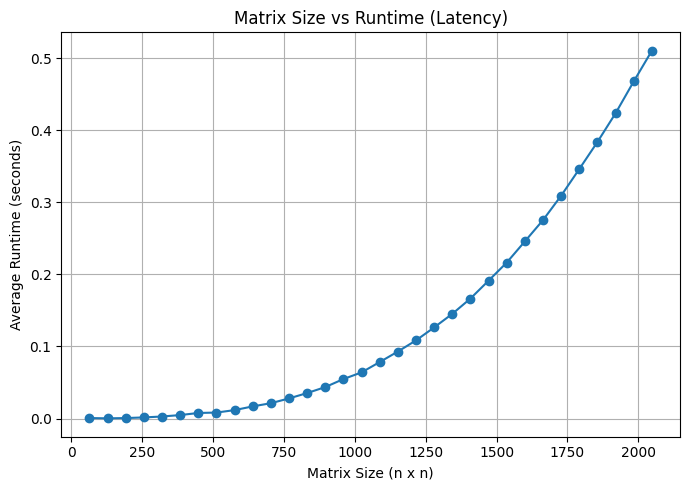

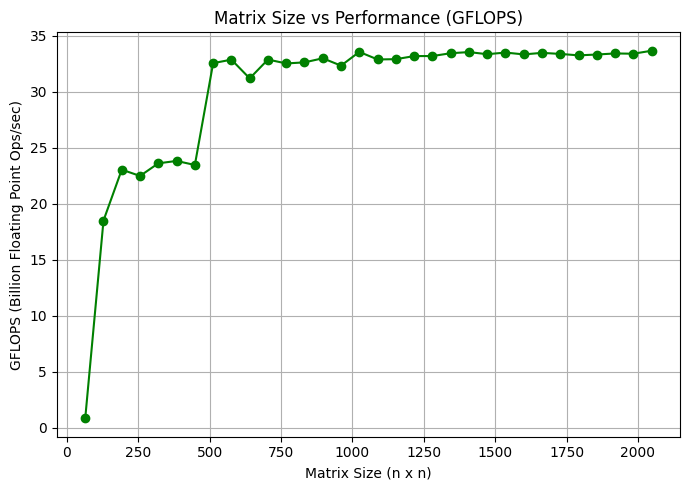

In [4]:
import sys
sys.path.append("..")

from benchmarks.plot_latency_benchmark import plot_benchmark

df = plot_benchmark("latency_core0.csv")
